In [1]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

import seaborn as sns

%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_table('news_data.csv', sep=',')
df

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회
...,...,...
5244,신종 코로나바이러스 감염증(코로나19) 사태 이후 ‘가정의 달’ 5월에도 언택트(비...,IT/과학
5245,는 소비자로부터 월 이용료 1만~2만원을 받고 초고속 인터넷을 제공한다. 그런 SK...,IT/과학
5246,머리를 긁고 있는 오랑우탄. 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이...,IT/과학
5247,가 오는 15일 정식 출시하는 스마트폰 'LG벨벳'이 사실상 '공짜폰'이 될 전망이...,IT/과학


In [4]:
df.isnull().sum()

news    0
code    0
dtype: int64

In [5]:
df['news'].nunique()

3987

In [6]:
#중복 샘플 제거
df.drop_duplicates(subset=['news'], inplace=True)
len(df)

3987

In [7]:
code_count = df['code'].value_counts()
code_count

사회       1670
생활/문화    1414
IT/과학     903
Name: code, dtype: int64

In [8]:
code_count.shape[0]

3

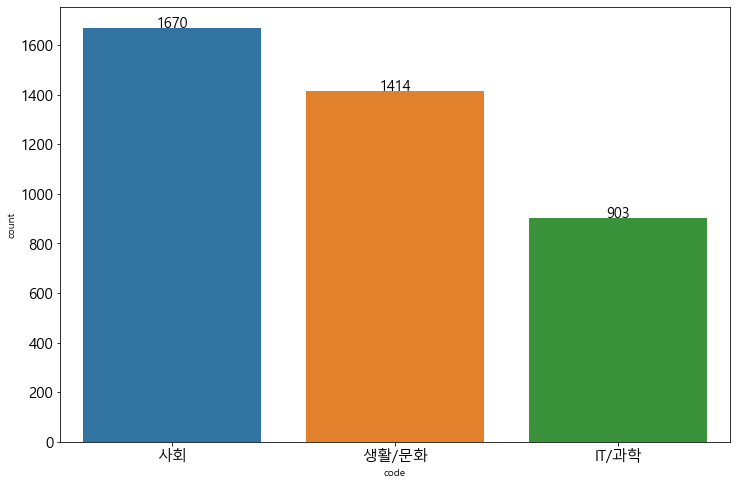

In [9]:
plt.figure(figsize=(12,8))
g = sns.countplot(data=df, x='code')

for i in range(code_count.shape[0]):
    g.text(x=i, y=code_count[i], s= code_count[i],
           fontsize = 'x-large', 
           horizontalalignment='center')
    
g.tick_params(labelsize=15)
plt.show()

In [10]:
from konlpy.tag import Okt

In [11]:
tokenizer = Okt()

In [12]:
kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

In [13]:
print(tokenizer.nouns(kor_text))

['밤', '귀가', '여성', '범죄', '시도', '남성', '구속', '서울', '경찰서', '상해', '혐의', '씨', '구속', '수사', '일', '씨', '지난달', '일', '피해', '여성', '인근', '지하철', '역', '폭행', '시도', '혐의', '피해', '여성', '저항', '놀란', '씨', '신고', '주변', '수색', '경찰', '체포', '피해', '여성', '이', '과정', '부상', '것']


In [15]:
df['tokenized'] = df['news'].apply(tokenizer.nouns)

In [16]:
stop_words = ['기자', '제공', '무단', '배포', '무단배포', '배포금지', '이번', '위해', '라며', '금지', '뉴스', '통해', '오늘', '지난달', '지난', '대한', '경우', '관련', '뉴시스', '현재', '지난해', '때문', '지금', '또한', '만큼', '최근', '당시', '올해', '대해', '다시', '모두']

In [17]:
test_list = ['경찰서','상해','혐의','씨','구속','수사','일']
remove_word_list = ['경찰서','구속']

In [19]:
test_list= [item for item in test_list if item not in remove_word_list and len(item)>1]
test_list

['상해', '혐의', '수사']

In [20]:
df['tokenized'] = df['tokenized'].apply(lambda x : [item for item in x if item not in stop_words and len(item) > 1])

In [21]:
df

,news,code,tokenized
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회,"[파주, 시청, 사진, 파주시, 파주, 시청, 사진, 파주시, 파주, 파이낸셜뉴스,..."
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회,"[동영상, 이천, 물류, 창고, 화재, 발화, 지점, 지목, 지하, 산소, 단기, ..."
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회,"[황범, 의정부시, 부시장, 을지대, 학교, 의정부, 캠퍼스, 부속, 병원, 공사,..."
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회,"[갓길, 여성, 성범죄, 시도, 남성, 구속, 서울, 강남, 경찰서, 강간, 상해,..."
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회,"[서울, 연합뉴스, 사회, 코로나바이러스, 감염증, 대응, 체계, 사회, 거리, 두..."
...,...,...,...
4950,신종 코로나바이러스 감염증(코로나19) 사태 이후 ‘가정의 달’ 5월에도 언택트(비...,IT/과학,"[신종, 코로나바이러스, 감염증, 코로나, 사태, 이후, 가정, 언택트, 비대, 풍..."
4951,는 소비자로부터 월 이용료 1만~2만원을 받고 초고속 인터넷을 제공한다. 그런 SK...,IT/과학,"[소비자, 로부터, 이용, 고속, 인터넷, 브로드밴드, 동영상, 공급, 업체, 이용..."
4952,머리를 긁고 있는 오랑우탄. 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이...,IT/과학,"[머리, 오랑우탄, 행동, 부정, 감정, 연구, 결과, 머리, 오랑우탄, 행동, 부..."
4953,가 오는 15일 정식 출시하는 스마트폰 'LG벨벳'이 사실상 '공짜폰'이 될 전망이...,IT/과학,"[정식, 출시, 스마트폰, 벨벳, 사실, 공짜, 전망, 단말기, 가격, 할인, 통신..."


In [22]:
df[df['code'] == '사회']

,news,code,tokenized
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회,"[파주, 시청, 사진, 파주시, 파주, 시청, 사진, 파주시, 파주, 파이낸셜뉴스,..."
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회,"[동영상, 이천, 물류, 창고, 화재, 발화, 지점, 지목, 지하, 산소, 단기, ..."
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회,"[황범, 의정부시, 부시장, 을지대, 학교, 의정부, 캠퍼스, 부속, 병원, 공사,..."
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회,"[갓길, 여성, 성범죄, 시도, 남성, 구속, 서울, 강남, 경찰서, 강간, 상해,..."
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회,"[서울, 연합뉴스, 사회, 코로나바이러스, 감염증, 대응, 체계, 사회, 거리, 두..."
...,...,...,...
1994,전세계 여러 국가 가운데 대한민국 토익 응시자들의 전체 성적은 몇등일까?YBM 한국...,사회,"[전세계, 여러, 국가, 가운데, 대한민국, 토익, 응시, 전체, 성적, 한국, 위..."
1995,한남대 조형예술학부 회화전공 박경범(사진 왼쪽) 교수가 이광섭( 오른쪽) 총장에게 ...,사회,"[한남대, 조형예술, 학부, 회화, 전공, 박경범, 사진, 왼쪽, 교수, 이광섭, ..."
1996,국방부 전경. /뉴스1 DB 국방부 전경. /뉴스1 DB\n\n(서울=뉴스1) 이원...,사회,"[국방부, 전경, 국방부, 전경, 서울, 이원준, 처음, 신종, 코로나바이러스, 감..."
1997,[수원=뉴시스] 박다예 기자 = 경기도청 전경. 2020.04.22 (사진 = 경기...,사회,"[수원, 박다예, 경기, 도청, 전경, 사진, 경기도, 수원, 박다예, 경기, 도청..."


In [24]:
import numpy as np

In [30]:
social_news = np.hstack(df[df['code']=='사회']['tokenized'].values)

life_news = np.hstack(df[df['code']=='생활/문화']['tokenized'].values)

it_news = np.hstack(df[df['code']=='IT/과학']['tokenized'].values)

In [31]:
print(len(social_news))
print(len(life_news))
print(len(it_news))

255728
242104
162484


In [32]:
from collections import Counter

In [35]:
social_news_word_count = Counter(social_news)
life_news_word_count = Counter(life_news)
it_news_word_count = Counter(it_news)

In [38]:
df[df['code'] == '사회'].tokenized.reset_index(drop=True)

0       [파주, 시청, 사진, 파주시, 파주, 시청, 사진, 파주시, 파주, 파이낸셜뉴스,...
1       [동영상, 이천, 물류, 창고, 화재, 발화, 지점, 지목, 지하, 산소, 단기, ...
2       [황범, 의정부시, 부시장, 을지대, 학교, 의정부, 캠퍼스, 부속, 병원, 공사,...
3       [갓길, 여성, 성범죄, 시도, 남성, 구속, 서울, 강남, 경찰서, 강간, 상해,...
4       [서울, 연합뉴스, 사회, 코로나바이러스, 감염증, 대응, 체계, 사회, 거리, 두...
                              ...                        
1665    [전세계, 여러, 국가, 가운데, 대한민국, 토익, 응시, 전체, 성적, 한국, 위...
1666    [한남대, 조형예술, 학부, 회화, 전공, 박경범, 사진, 왼쪽, 교수, 이광섭, ...
1667    [국방부, 전경, 국방부, 전경, 서울, 이원준, 처음, 신종, 코로나바이러스, 감...
1668    [수원, 박다예, 경기, 도청, 전경, 사진, 경기도, 수원, 박다예, 경기, 도청...
1669    [경기도, 시공사, 도내, 소득, 청년, 주거, 안정, 다가, 주택, 매도, 신청,...
Name: tokenized, Length: 1670, dtype: object

In [39]:
np.concatenate(df[df['code']=='사회'].tokenized.reset_index(drop=True))

array(['파주', '시청', '사진', ..., '홈페이지', '확인', '코리아'], dtype='<U9')

In [40]:
social_news

array(['파주', '시청', '사진', ..., '홈페이지', '확인', '코리아'], dtype='<U9')

In [42]:
temp_data = ' '.join(social_news)

In [44]:
from wordcloud import WordCloud

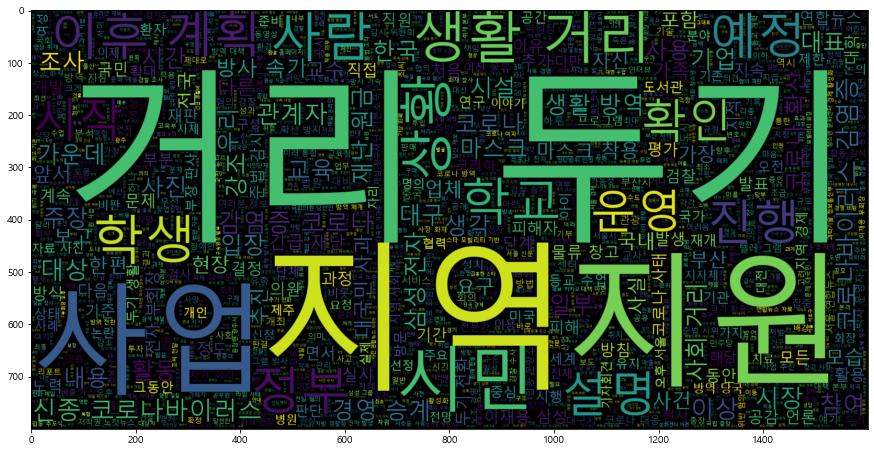

In [47]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path ='c:/Windows/Fonts/malgun.ttf ').generate(temp_data)
plt.imshow(wc, interpolation = 'bilinear')